## Importing required packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import random

## Setting up column names for the dataset

In [2]:
columns = ["duration",
"protocol_type",
"service",
"flag",
"src_bytes",
"dst_bytes",
"land",
"wrong_fragment",
"urgent",
"hot",
"num_failed_logins",
"logged_in",
"num_compromised",
"root_shell",
"su_attempted",
"num_root",
"num_file_creations",
"num_shells",
"num_access_files",
"num_outbound_cmds",
"is_host_login",
"is_guest_login",
"count",
"srv_count",
"serror_rate",
"srv_serror_rate",
"rerror_rate",
"srv_rerror_rate",
"same_srv_rate",
"diff_srv_rate",
"srv_diff_host_rate",
"dst_host_count",
"dst_host_srv_count",
"dst_host_same_srv_rate",
"dst_host_diff_srv_rate",
"dst_host_same_src_port_rate",
"dst_host_srv_diff_host_rate",
"dst_host_serror_rate",
"dst_host_srv_serror_rate",
"dst_host_rerror_rate",
"dst_host_srv_rerror_rate",
"attack_type"]

## Adding attack categories

In [3]:
attack_category = {'back': 'dos', 'buffer_overflow': 'u2r', 'ftp_write': 'r2l', 'guess_passwd': 'r2l', 
                   'imap': 'r2l', 'ipsweep': 'probe', 'land': 'dos', 'loadmodule': 'u2r', 'multihop': 'r2l', 
                   'neptune': 'dos', 'nmap': 'probe', 'perl': 'u2r', 'phf': 'r2l', 'pod': 'dos', 'portsweep': 'probe', 
                   'rootkit': 'u2r', 'satan': 'probe', 'smurf': 'dos', 'spy': 'r2l', 'teardrop': 'dos', 
                   'warezclient': 'r2l', 'warezmaster': 'r2l', 'normal': 'normal'}

## Importing train and test datasets

In [112]:
train_data_uncleaned = pd.read_csv("kddcup.data_10_percent.gz",names=columns)
test_data_uncleaned = pd.read_csv("corrected.gz",names=columns)

In [5]:
train_data_uncleaned.attack_type.value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: attack_type, dtype: int64

<AxesSubplot:>

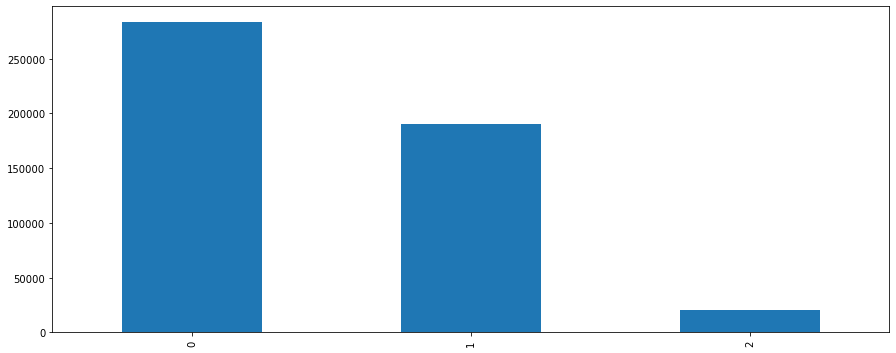

In [110]:
train_data_uncleaned["protocol_type"].value_counts().plot(kind="bar", figsize=(15,6))

<AxesSubplot:>

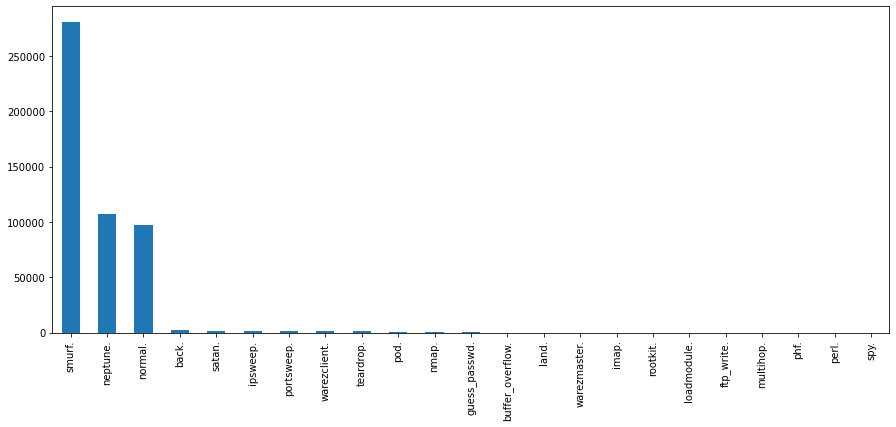

In [113]:
train_data_uncleaned["attack_type"].value_counts().plot(kind="bar", figsize=(15,6))

<AxesSubplot:>

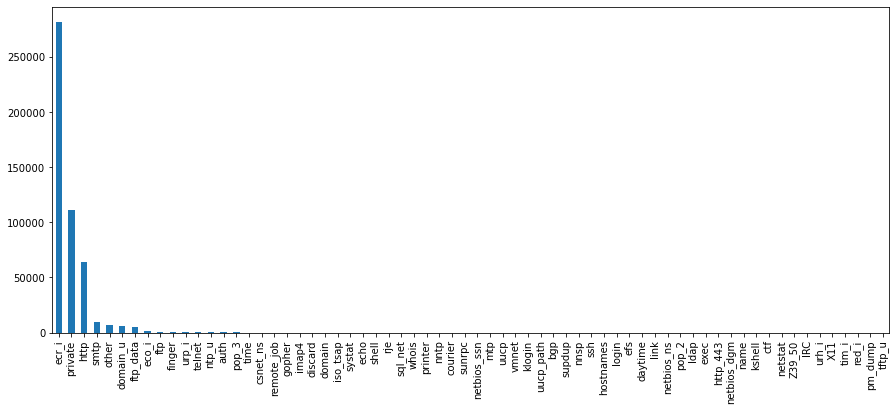

In [114]:
train_data_uncleaned["service"].value_counts().plot(kind="bar", figsize=(15,6))

## Cleaning dataset 

In [19]:
def clean_data(data,attack_category,isTest):
    
    df = data
    # Since target column has a period at the end we remove it  
    df['attack_type'] = df['attack_type'].apply(lambda x:x[:-1])
    
    # Test data has some extra attacks not provided in training ,remove the extras
    if isTest:
        df = df.loc[df.attack_type.isin(list(attack_category.keys()))]
        
    # add attack_type column
    df['attack_category'] = df['attack_type'].apply(lambda x:attack_category[x])
    
    # Convert categorical data to numeric and type cast them int64
    for col in ['protocol_type','service','flag','attack_category']:
        df[col] = pd.Categorical(df[col])
        
        
    print(dict( enumerate(df['attack_category'].cat.categories ) ))
    
    df['flag'] = df.flag.cat.codes
    df['protocol_type'] = df.protocol_type.cat.codes
    df['service'] = df.service.cat.codes
    df['attack_category'] = df.attack_category.cat.codes
    
    
    
    df['service'] = df['service'].astype(np.int64)
    df['flag'] = df['flag'].astype(np.int64)
    df['protocol_type'] = df['protocol_type'].astype(np.int64)
    df['attack_category'] = df['attack_category'].astype(np.int64)
    
    # Filter data to remove attack types with less then 20 rows
    if not isTest:
        df = df.groupby('attack_type').filter(lambda x : len(x)>21)
        
    # Delete the corresponsding attack types in test data
    delete_values = ['land','ftp_write','imap','multihop','phf','spy','warezmaster','loadmodule','rootkit','perl']
    if(isTest):
        df = df.loc[~df.attack_type.isin(delete_values)]
    
    return df

In [20]:
data = clean_data(train_data_uncleaned, attack_category, False)
test_data = clean_data(test_data_uncleaned,attack_category,True)

{0: 'dos', 1: 'normal', 2: 'probe', 3: 'r2l', 4: 'u2r'}
{0: 'dos', 1: 'normal', 2: 'probe', 3: 'r2l', 4: 'u2r'}


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

In [21]:
data.groupby(["attack_category","attack_type" ]).size()

attack_category  attack_type    
0                back                 2203
                 neptune            107201
                 pod                   264
                 smurf              280790
                 teardrop              979
1                normal              97278
2                ipsweep              1247
                 nmap                  231
                 portsweep            1040
                 satan                1589
3                guess_passwd           53
                 warezclient          1020
4                buffer_overflow        30
dtype: int64

In [22]:
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,1,22,9,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal,1
1,0,1,22,9,239,486,0,0,0,0,...,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal,1
2,0,1,22,9,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,1
3,0,1,22,9,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal,1
4,0,1,22,9,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494016,0,1,22,9,310,1881,0,0,0,0,...,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal,1
494017,0,1,22,9,282,2286,0,0,0,0,...,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal,1
494018,0,1,22,9,203,1200,0,0,0,0,...,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal,1
494019,0,1,22,9,291,1200,0,0,0,0,...,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal,1


In [23]:
data.shape

(493925, 43)

### Dropping attack types since we are only detecting attack or normal connections

In [24]:
df = data.drop(['attack_type',], axis=1)

### Taking important 8 features

In [25]:
df2 = df[["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","attack_category"]]

<AxesSubplot:>

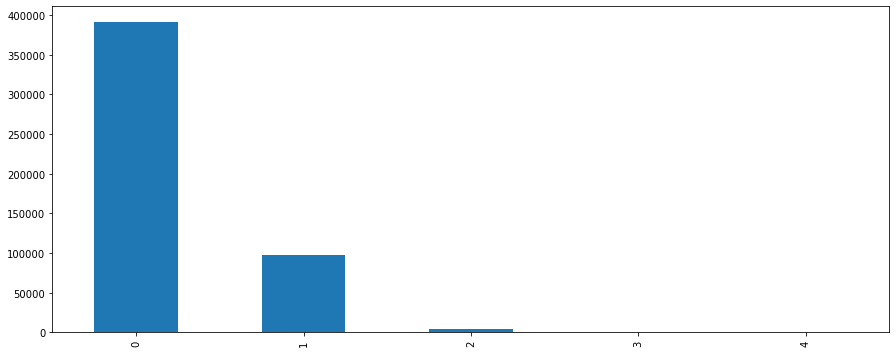

In [108]:
df2["attack_category"].value_counts().plot(kind='bar', figsize=(15,6))

#{0: 'dos', 1: 'normal', 2: 'probe', 3: 'r2l', 4: 'u2r'}

In [28]:
df.attack_category.value_counts()

0    391437
1     97278
2      4107
3      1073
4        30
Name: attack_category, dtype: int64

In [29]:
df2.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,attack_category
count,493925.000000,493925.000000,493925.000000,493925.000000,4.939250e+05,4.939250e+05,493925.000000,493925.000000
mean,47.980465,0.467022,23.408181,7.842397,3.026167e+03,7.052202e+02,0.000002,0.220339
std,707.813437,0.575603,13.538028,2.250941,9.883141e+05,1.673892e+04,0.001423,0.449648
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,14.000000,9.000000,4.500000e+01,0.000000e+00,0.000000,0.000000
50%,0.000000,0.000000,14.000000,9.000000,5.200000e+02,0.000000e+00,0.000000,0.000000
75%,0.000000,1.000000,42.000000,9.000000,1.032000e+03,0.000000e+00,0.000000,0.000000
max,58329.000000,2.000000,65.000000,10.000000,6.933756e+08,5.134218e+06,1.000000,4.000000


### Scaling dataset 

In [30]:
from sklearn.preprocessing import MinMaxScaler

In [31]:
y_train = df2[['attack_category']].values.ravel()
x_train = df2.drop(['attack_category',], axis=1)

sc = MinMaxScaler()
x_train = sc.fit_transform(x_train)

In [32]:
df_train = pd.DataFrame(data = x_train, columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land"])

### Final training dataset

In [33]:
df_train.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land
count,493925.000000,493925.000000,493925.000000,493925.000000,4.939250e+05,493925.000000,493925.000000
mean,0.000823,0.233511,0.360126,0.784240,4.364397e-06,0.000137,0.000002
std,0.012135,0.287801,0.208277,0.225094,1.425366e-03,0.003260,0.001423
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,0.215385,0.900000,6.489989e-08,0.000000,0.000000
50%,0.000000,0.000000,0.215385,0.900000,7.499542e-07,0.000000,0.000000
75%,0.000000,0.500000,0.646154,0.900000,1.488371e-06,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000


# Genetic Algorithm Implementation

### Setting up a random population

In [34]:
population = []
populationSize = 100

for current in range(populationSize):
    chromosome = []
#     for col in df_train.columns:
#         r = random.randint(df_train[col].min(),df_train[col].max()+1)
#         #print(col,df[col].min(),df[col].max(),r)
#         chromosome.append(r)
    chromosome = np.random.rand(8)
    chromosome[-1] = random.randint(0,1)
    population.append(chromosome)
    #print(chromosome)
print(population)

[array([0.0481129 , 0.78181443, 0.32490103, 0.43085053, 0.23380981,
       0.57449593, 0.21344075, 1.        ]), array([0.1909491 , 0.40473573, 0.52163815, 0.77069537, 0.29812709,
       0.35176495, 0.15631547, 0.        ]), array([0.38424684, 0.12291851, 0.51083954, 0.30209763, 0.61972935,
       0.15561013, 0.58047759, 0.        ]), array([0.50817573, 0.21538031, 0.9405849 , 0.48359026, 0.38970185,
       0.89538009, 0.85976856, 1.        ]), array([0.80143623, 0.90058469, 0.60270225, 0.85541887, 0.07622014,
       0.14673419, 0.71935447, 0.        ]), array([0.25376276, 0.32601113, 0.01722396, 0.13191466, 0.52826985,
       0.18677781, 0.89674022, 0.        ]), array([0.89004146, 0.02491795, 0.92883127, 0.45979946, 0.93750068,
       0.6841141 , 0.34544944, 0.        ]), array([0.94191463, 0.89037303, 0.01155021, 0.96228495, 0.05338295,
       0.06189236, 0.56975495, 1.        ]), array([0.21759444, 0.00668224, 0.95245362, 0.41275202, 0.12107444,
       0.02794391, 0.2693919 , 0.   

### Fitness function

In [66]:
def fitness(chromosome):
#    vals = []
    A = df.loc[df["attack_category"] != 1].shape[0] #total attacks in the dataset
    B = df.loc[df["attack_category"] == 1].shape[0] #total normal connections in  the dataset
    
    a = 0 # number of connections correctly recognized as attacks by the chromosome (true positives)
    b = 0 # number of connections incorrectly recognized as attacks by the chromosome (false positives)
    for index,rows in df_train.iterrows(): 
        totalError = 0
        k = 0
#        if(index > 5000):
#            break
        for col in df_train.columns:
            totalError = totalError + abs(rows[col] - chromosome[k])
            k += 1
#        vals.append(totalError.round(1))
        #print(total)
        if totalError < 3: #experimental value -> closely bounded
            if y_train[index] != 1 and chromosome[-1] != 1:
                a += 1
            if y_train[index] == 1 and chromosome[-1] != 1:
                b += 1
    
    F = (a/A) - (b/B) 
    return F
#    return vals

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5001 non-null   float64
dtypes: float64(1)
memory usage: 39.2 KB


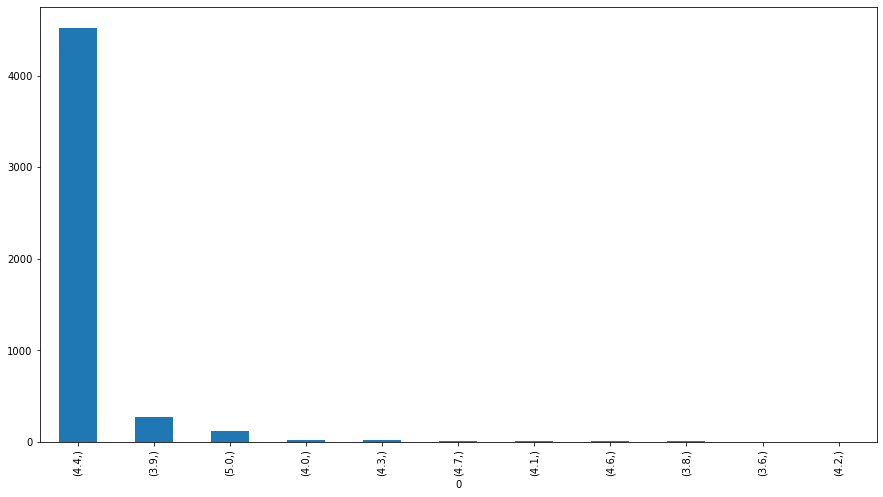

In [65]:
vals = fitness([0.89004146, 0.02491795, 0.92883127, 0.45979946, 0.93750068,
       0.6841141 , 0.34544944, 0.        ])

d = pd.DataFrame(vals)
d.value_counts().plot(kind='bar',figsize=(15,8))

<AxesSubplot:xlabel='0'>

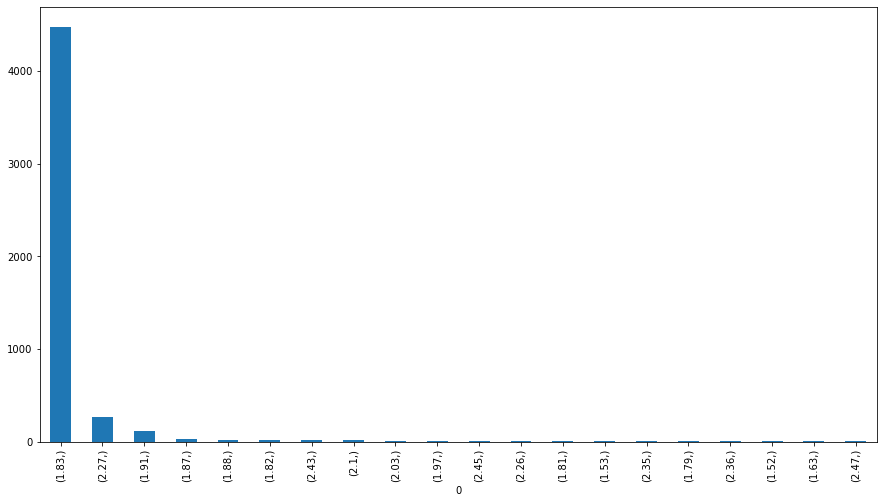

In [60]:
vals = fitness([0.0481129 , 0.78181443, 0.32490103, 0.43085053, 0.23380981,
       0.57449593, 0.21344075, 1.        ])

d = pd.DataFrame(vals)
d.value_counts().plot(kind='bar',figsize=(15,8))

### Crossover function

In [68]:
def crossOverSingle(parentOne, parentTwo):
    
    for i in range(len(parentOne)):
        left = parentOne[i]
        right = parentTwo[i]
        
        r = random.randint(0,len(left)-1)
        left[r],right[r] = right[r],left[r] #single point crossover
        
    parentOne.extend(parentTwo)
    return parentOne

In [97]:
def crossOverTwo(parentOne, parentTwo):
    
    for i in range(len(parentOne)):
        left = parentOne[i]
        right = parentTwo[i]
        
        l = random.randint(0,len(left)-2) #left point
        r = random.randint(l,len(left)-1) #right point
        
        left[0:l], right[0:l] = right[0:l], left[0:l] #Two point crossover
        left[r:],right[r:] = right[r:],left[r:] 
        
    parentOne.extend(parentTwo)
    return parentOne

### Mutation function

In [69]:
def mutate(chromosome, mutation_rate):
    r = np.random.rand()
    #if random number is lesser than mutation rate, change any random gene
    if r < mutation_rate:
        #flipping
        gene = random.randint(0,len(chromosome)-1)
        chromosome[gene] = 1 - chromosome[gene] 
        
    return chromosome

In [98]:
maxGenerations = 30
currentGen = 1
mutation_rate = 0.01

while currentGen <= maxGenerations:

    print("Generation: ", currentGen, end=", ")
    
    fitnessVals = []
    
    #calculating fitness
    for chromosome in population:
        fitVal = fitness(chromosome)
        #print(fitVal)
        if fitVal == 0:#loosely bounded
            continue
        fitnessVals.append([fitVal,chromosome])
        #print(fitnessVals[-1][0])
    
    #Selecting top 10 fit chromosomes
    fitnessVals.sort(reverse=True, key = lambda x:x[0])
    topFitness = fitnessVals[0:10]
    print("Top Fitness: ", topFitness[0][0])
    
    topChromosomes = []
    for top in topFitness:
        topChromosomes.append(top[1]) #len -> 10
    
    nextGen = []
    #Cloning 5 times
    for i in range(5):
        nextGen.extend(topChromosomes) #len -> 50
  
    #Crossover
    parentOne = nextGen[0:25]
    parentTwo = nextGen[25:]
    nextGen = crossOverSingle(parentOne, parentTwo)
    #nextGen = crossOverTwo(parentOne, parentTwo)
    
    #Mutation
    for chromosome in nextGen:
        chromosome = mutate(chromosome,mutation_rate)
    
    #Calculating fitness and selecting top 30 fit chromosomes
    newfitnessVals = []
    for chromosome in nextGen:
        newfitnessVals.append([fitness(chromosome),chromosome])
    
    newfitnessVals.sort(reverse=True, key = lambda x:x[0])    
    newtopFitness = newfitnessVals[0:30]
    
    #print("New Top Fitness: ", newtopFitness[0])
    newtopChromosomes = []
    
    for top in newtopFitness:
        newtopChromosomes.append(top[1])
        
    
    #Randomly generate 50 chromosomes + 30 fit crossover chromosomes + 20 fit initial chromosome
    nextPopulation = []
    for i in range(50):
        chromosome = np.random.rand(8)
        chromosome[-1] = random.randint(0,1)
        nextPopulation.append(chromosome)
        
    nextPopulation.extend(topChromosomes) # 10 fit initial
    nextPopulation.extend(topChromosomes) # 10 fit initial
    nextPopulation.extend(newtopChromosomes) # 30 fit crossover
    
    population = nextPopulation #100 size
    currentGen += 1

Generation:  1, Top Fitness:  1.887242653623264e-04
Generation:  2, Top Fitness:  2.143592813828472e-04
Generation:  3, Top Fitness:  3.925476643228685e-03
Generation:  4, Top Fitness:  0.16641926643228685
Generation:  5, Top Fitness:  0.16641926643228685
Generation:  6, Top Fitness:  0.16641926643228685
Generation:  7, Top Fitness:  0.16641926643228685
Generation:  8, Top Fitness:  0.16641926643228685
Generation:  9, Top Fitness:  0.16641926643228685
Generation:  10, Top Fitness:  0.16641926643228685
Generation:  11, Top Fitness:  0.16641926643228685
Generation:  12, Top Fitness:  0.16641926643228685
Generation:  13, Top Fitness:  0.16641926643228685
Generation:  14, Top Fitness:  0.24802541382525128
Generation:  15, Top Fitness:  0.24802541382525128
Generation:  16, Top Fitness:  0.24802541382525128
Generation:  17, Top Fitness:  0.45344108329108312
Generation:  18, Top Fitness:  0.45344108329108312
Generation:  19, Top Fitness:  0.45344108329108312
Generation:  20, Top Fitness:  0.4

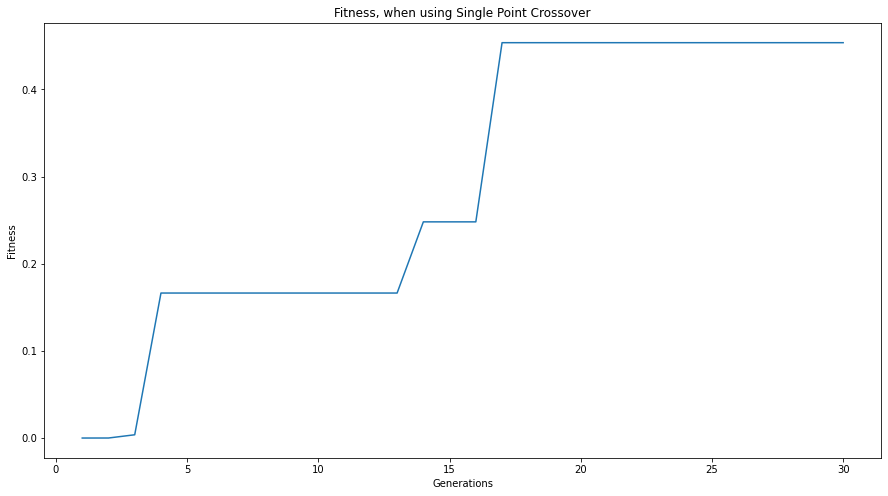

In [95]:
Generations = [x for x in range(1,31)]
Fitness = [1.887242653623264e-04, 2.143592813828472e-04,3.925476643228685e-03,0.16641926643228685,
           0.16641926643228685,0.16641926643228685,0.16641926643228685,0.16641926643228685,
           0.16641926643228685,0.16641926643228685,0.16641926643228685,0.16641926643228685,
           0.16641926643228685,0.24802541382525128,0.24802541382525128,0.24802541382525128,
          0.45344108329108312,0.45344108329108312,0.45344108329108312,0.45344108329108312,0.45344108329108312,
          0.45344108329108312,0.45344108329108312,0.45344108329108312,0.45344108329108312,0.45344108329108312,
          0.45344108329108312,0.45344108329108312,0.45344108329108312,0.45344108329108312]


plt.figure(figsize = (15,8))
plt.plot(Generations, Fitness)
plt.title("Fitness, when using Single Point Crossover")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.show()

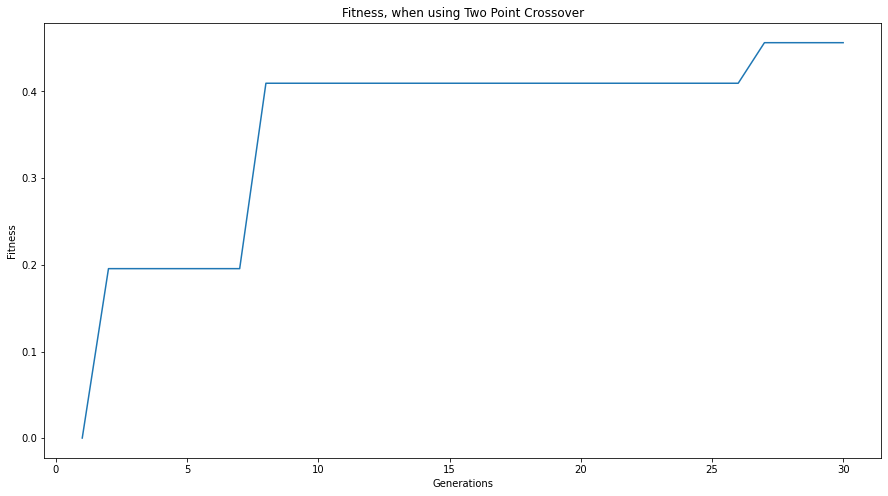

In [96]:
Generations = [x for x in range(1,31)]
Fitness = [2.0418614359281472e-04, 0.195597532678324,0.195597532678324,0.195597532678324,
           0.195597532678324,0.195597532678324,0.195597532678324,0.409459872398421,
           0.409459872398421,0.409459872398421,0.409459872398421,0.409459872398421,
           0.409459872398421,0.409459872398421,0.409459872398421,0.409459872398421,
          0.409459872398421,0.409459872398421,0.409459872398421,0.409459872398421,0.409459872398421,
           0.409459872398421,0.409459872398421,0.409459872398421,0.409459872398421,
           0.409459872398421,0.4562441023291243,0.4562441023291243,0.4562441023291243,0.4562441023291243]

plt.figure(figsize = (15,8))
plt.plot(Generations, Fitness)
plt.title("Fitness, when using Two Point Crossover")
plt.xlabel("Generations")
plt.ylabel("Fitness")
plt.show()

## Best population after 30 generations

In [70]:
population

[array([0.0481129 , 0.78181443, 0.32490103, 0.43085053, 0.23380981,
        0.57449593, 0.21344075, 1.        ]),
 array([0.1909491 , 0.40473573, 0.52163815, 0.77069537, 0.29812709,
        0.35176495, 0.15631547, 0.        ]),
 array([0.38424684, 0.12291851, 0.51083954, 0.30209763, 0.61972935,
        0.15561013, 0.58047759, 0.        ]),
 array([0.50817573, 0.21538031, 0.9405849 , 0.48359026, 0.38970185,
        0.89538009, 0.85976856, 1.        ]),
 array([0.80143623, 0.90058469, 0.60270225, 0.85541887, 0.07622014,
        0.14673419, 0.71935447, 0.        ]),
 array([0.25376276, 0.32601113, 0.01722396, 0.13191466, 0.52826985,
        0.18677781, 0.89674022, 0.        ]),
 array([0.89004146, 0.02491795, 0.92883127, 0.45979946, 0.93750068,
        0.6841141 , 0.34544944, 0.        ]),
 array([0.94191463, 0.89037303, 0.01155021, 0.96228495, 0.05338295,
        0.06189236, 0.56975495, 1.        ]),
 array([0.21759444, 0.00668224, 0.95245362, 0.41275202, 0.12107444,
        0.02794391, 

## Running the test dataset on the evolved population for detection

In [71]:
test_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack_type,attack_category
0,0,2,45,9,105,146,0,0,0,0,...,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal,1
1,0,2,45,9,105,146,0,0,0,0,...,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal,1
2,0,2,45,9,105,146,0,0,0,0,...,1.00,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal,1
6,0,2,11,9,29,0,0,0,0,0,...,0.30,0.30,0.30,0.0,0.0,0.0,0.0,0.0,normal,1
7,0,2,45,9,105,146,0,0,0,0,...,0.99,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311024,0,2,45,9,105,147,0,0,0,0,...,1.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal,1
311025,0,2,45,9,105,147,0,0,0,0,...,1.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal,1
311026,0,2,45,9,105,147,0,0,0,0,...,1.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal,1
311027,0,2,45,9,105,147,0,0,0,0,...,1.00,0.00,0.01,0.0,0.0,0.0,0.0,0.0,normal,1


In [72]:
df3 = test_data.drop(['attack_type',], axis=1)

In [73]:
df4 = df3[["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","attack_category"]]

In [74]:
df4

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,attack_category
0,0,2,45,9,105,146,0,1
1,0,2,45,9,105,146,0,1
2,0,2,45,9,105,146,0,1
6,0,2,11,9,29,0,0,1
7,0,2,45,9,105,146,0,1
...,...,...,...,...,...,...,...,...
311024,0,2,45,9,105,147,0,1
311025,0,2,45,9,105,147,0,1
311026,0,2,45,9,105,147,0,1
311027,0,2,45,9,105,147,0,1


In [75]:
y_test = df4[['attack_category']].values.ravel()
x_test = df4.drop(['attack_category',], axis=1)

sc = MinMaxScaler()
x_test = sc.fit_transform(x_test)

In [76]:
df_test = pd.DataFrame(data = x_test, columns = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land"])

In [77]:
df_test.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land
count,290648.000000,290648.00000,290648.000000,290648.000000,290648.000000,290648.000000,290648.0
mean,0.000042,0.24481,0.374503,0.760277,0.000134,0.000151,0.0
std,0.004513,0.30149,0.214705,0.286699,0.002539,0.003196,0.0
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.00000,0.222222,0.900000,0.000017,0.000000,0.0
50%,0.000000,0.00000,0.222222,0.900000,0.000083,0.000000,0.0
75%,0.000000,0.50000,0.714286,0.900000,0.000164,0.000000,0.0
max,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0


<AxesSubplot:>

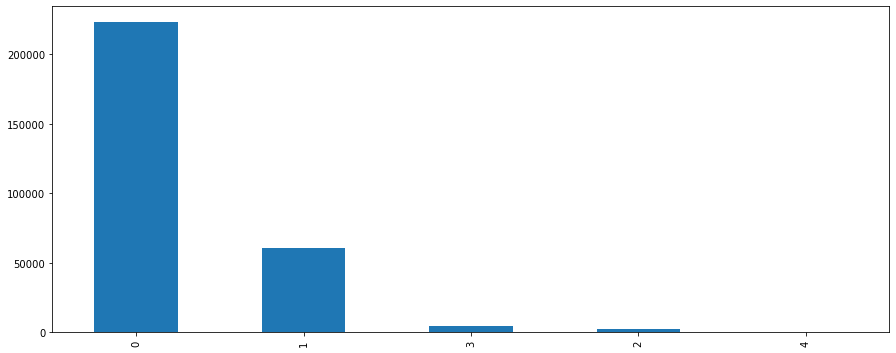

In [106]:
df4["attack_category"].value_counts().plot(kind='bar', figsize=(15,6))
#{0: 'dos', 1: 'normal', 2: 'probe', 3: 'r2l', 4: 'u2r'}

<AxesSubplot:>

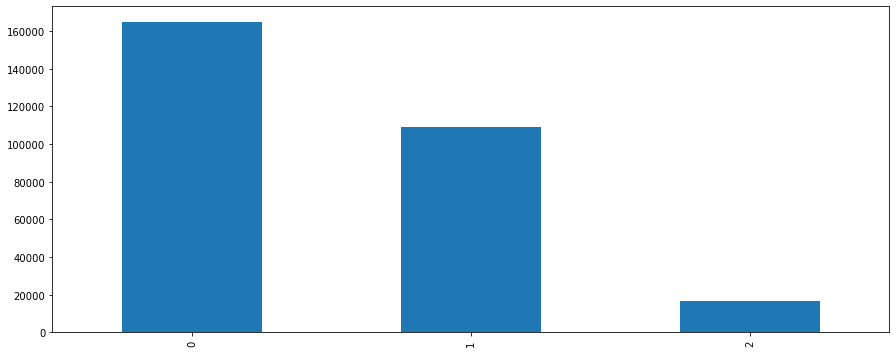

In [107]:
df4["protocol_type"].value_counts().plot(kind='bar', figsize=(15,6))

### Running tests

In [78]:
correctRecognized = 0
wrongRecognized = 0

totalAttacks = df3.loc[df3["attack_category"] != 1].shape[0]
totalNormal = df3.loc[df3["attack_category"] == 1].shape[0]

for index, rows in df_test.iterrows():
    for chromosome in population:
        totalError = 0
        k = 0
        for col in df_test.columns:
            totalError = totalError + abs(rows[col] - chromosome[k])
            k += 1
        #print(total)
        if totalError < 3:
            if y_test[index] != 1 and chromosome[-1] != 1:
                correctRecognized += 1
            if y_train[index] == 1 and chromosome[-1] != 1:
                wrongRecognized += 1
            break

print("Total Attacks in the Test Dataset: ", totalAttacks)
print("Correctly Recognized Attacks: ", correctRecognized)
print("Percentage of Correctly Recognized Attacks: ", (correctRecognized / totalAttacks).round(3) , "%")
# print("Total Attacks in the Test Dataset: ", totalAttacks)
# print("Correctly Recognized Attacks: ", 223015)
# print("Percentage of Correctly Recognized Attacks: ", 96.939 , "%")

Total Attacks in the Test Dataset:  230055
Correctly Recognized Attacks:  223015
Percentage of Correctly Recognized Attacks:  96.939 %
